# 30 Nov 23 - Activity: Monte Carlo Integration

A useful approach to making models of systems is using randomness to find solutions to problems that are stable or static. One such approach is called [Monte Carlo integration](https://en.wikipedia.org/wiki/Monte_Carlo_integration) that can be used to find particularly problematic integrals. It's a useful pedagogical introduction to what we are attempting to do, use [Monte Carlo approaches](https://en.wikipedia.org/wiki/Monte_Carlo_method) to model thermodynamical systems using the [Metropolis-Hastings algorithm](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm).

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random as random
%matplotlib inline

## Finding Pi

This is a classic use of Monte Carlo integration that illustrates many of the concepts of the technique. Effectively, we can assume there's a constant (undetermined) that links that the area of a circle and the radius squared. 

$$A_{circle} = c r^2$$

We assume it's radius squared as a test because we know that boxes go like length times width and a sqaure with side length $r$ has:

$$A_{square} = r^2$$

Thus the ratio of the area of the circle to the area of the sqaure would give the constant!

$$\dfrac{A_{circle}}{A_{square}} = \dfrac{c r^2}{r^2} = c$$

This is true for any radius $r$, so we choose $r=1$. We also notice that we can solve this problem in one quadrant and multiple by four.  So let's graph that.

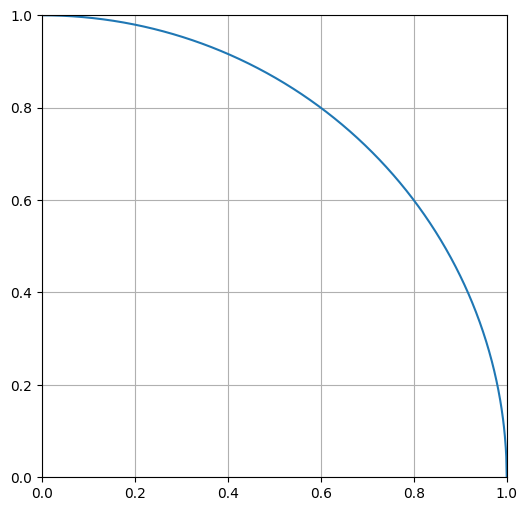

In [6]:
step = 0.001
x = np.arange(0,1+step,step)
y = np.sqrt(1-x**2)

plt.figure(figsize=(6,6))

plt.plot(x,y)

plt.axis([0, 1, 0, 1])
plt.grid()


### The Drop Algorithm

The concept behind this is watching rain hit the ground and counting the droplets inside and outside a circle. We can simulate this with random drops in the range from 0 to 1 in $x$ and $y$. Let's start with 500 drops. We plot the drops below.

In [7]:
ndrops = 500
drops = np.zeros([ndrops,2])

for i in range(ndrops):
    
    xrand = random.random()
    yrand = random.random()
    
    drops[i] = xrand,yrand

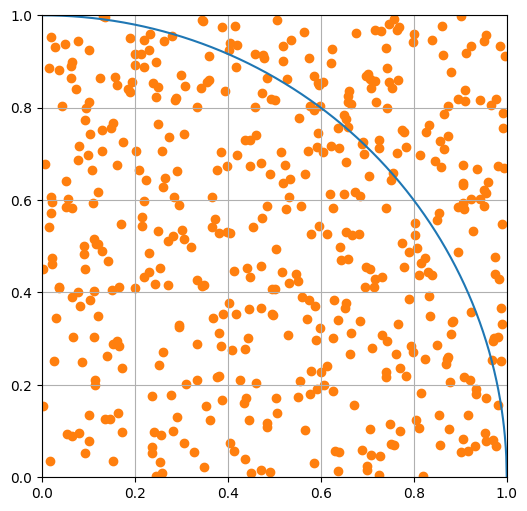

In [8]:
plt.figure(figsize=(6,6))

plt.plot(x,y)

plt.scatter(drops[:,0],drops[:,1], c='C1')

plt.axis([0, 1, 0, 1])
plt.grid()

Notice that some of the drops are outside the curve and some are inside. We can use the formula for a circle of radius 1 to find which are which. 

$$x^2 + y^2 = 1$$

If this produce is below 1, the drop is inside the curve; otherwise it's outside. The statement below forms a binary filter. You might have seen something like this before in CMSE 201. We can use those filters on the arrays are replot to confirm. The use of of the tilde (~) reverses the filter (true becomes false and vice versa).

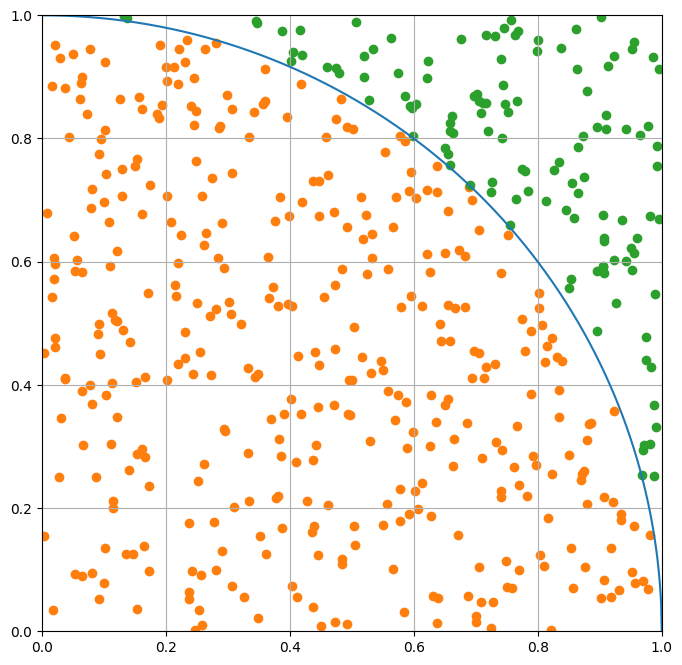

In [9]:
insideCurve = drops[:,0]**2+drops[:,1]**2 < 1

plt.figure(figsize=(8,8))

plt.plot(x, y, label='circle')

plt.scatter(drops[insideCurve,0],drops[insideCurve,1], c='C1', label='inside')
plt.scatter(drops[~insideCurve,0],drops[~insideCurve,1], c='C2', label='outside')

plt.axis([0, 1, 0, 1])
plt.grid()

### Computing Pi

We assumed our approach would bear out a constant.

$$c=\dfrac{A_{circle}}{A_{square}}$$

We can compute an estimate of it using the number of drops, which are proxies for the area of a quarter circle.

$$c \approx 4\dfrac{N_{inside}}{N}$$

Our estimate is below.

In [10]:
pi_estimate = 4*len(drops[insideCurve])/len(drops)
print(pi_estimate)

3.016


## Seeking Convergence

So the estimate was probably not great. But we can make it better by choosing more drops. So rewrite this approach a function where you can send the number of drops in and return the estimate of pi. Then use it to plot this estimate over many choices of N. Show what the value converges to.

In [11]:
## your code here
def estimate_pi(n):
    drops = np.zeros([n,2])
    for i in range(n):
        xrand = random.random() # random x coordinate
        yrand = random.random() # random y coordinate
        drops[i] = xrand,yrand
    insideCurve = drops[:,0]**2+drops[:,1]**2 < 1 # mask of points inside the circle
    return 4*len(drops[insideCurve])/len(drops)

def estimate_pi2(n):
    x = np.random.rand(n)
    y = np.random.rand(n)
    return 4*np.sum(x**2+y**2<1)/n

def estimate_pi3(n):
    return 4*np.count_nonzero(np.random.rand(n)**2+np.random.rand(n)**2<1)/n

Final estimate of pi:  3.1412932932932933
Mean of last chunk: 3.1414602931897107


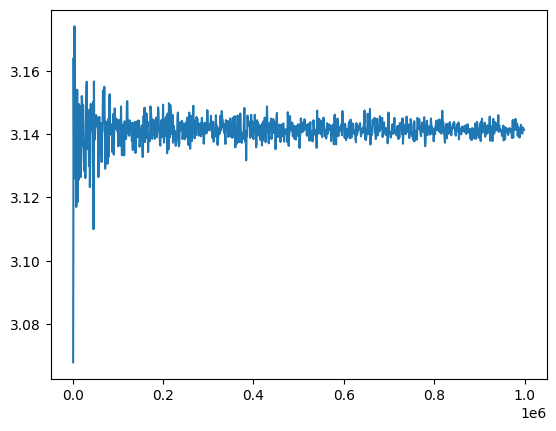

In [13]:
N = np.arange(1000,1000000,1000)
pi_estimates = np.zeros(len(N))
for i, n in enumerate(N):
    pi_estimates[i] = estimate_pi2(n)    

plt.plot(N,pi_estimates)

chunk = pi_estimates[800:]
chunk.mean()
print("Final estimate of pi: ", pi_estimates[-1])
print("Mean of last chunk:", chunk.mean())

## Finding the values of integrals

So that was a cool trick, but the power of this form of Monte Carlo is being able to compute very difficult integrals. It's not efficient as other integrators, but it's sometimes the only choice.

### Integrating sine

Using the same approach as before where we take the proportion of drops 'under the curve' compared to all drops, find the integral of $sin(x)$ over one interval. 

* Find the number of drops needed to make a reasonable estimate.
* Use the long term behavior (plot it?) to estimate the value and uncertainty in the integral

1.8912387774610553


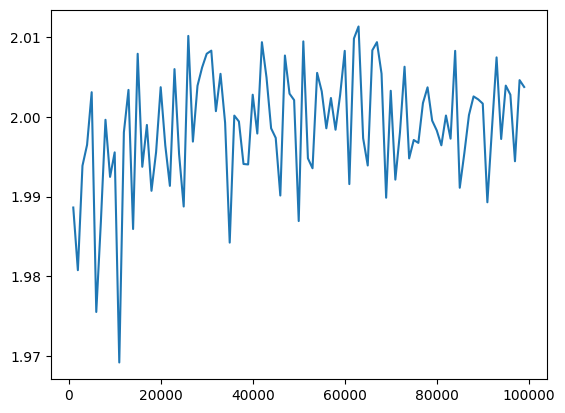

In [14]:
## your code here
n = 1000


# determine inside curve

def insideCurve(x,y, func):
    if y >= 0: # above x-axis
        if y <= func(x): # below curve
            return 1
    else: # below x-axis
        if y >= func(x): # above curve
            return -1
    return 0



def estimate_area(n, x_range, y_range, func):
    x_lower, x_upper = x_range
    y_lower, y_upper = y_range
    area = 0
    for i in range(n):
        xrand = random.uniform(x_lower,x_upper) # random x coordinate
        yrand = random.uniform(y_lower,y_upper) # random y coordinate
        area += insideCurve(xrand,yrand, func)
    return area/n * (x_upper-x_lower) * (y_upper-y_lower)

#vectorize insideCurve
def insideCurve2(x, y, func):
    mask = np.zeros(len(y))
    mask[y >= 0] = 2 # above x-axis
    mask[mask == 2] = y[mask == 2] <= func(x[mask == 2]) # below curve
    mask[y < 0] = -2 # below x-axis
    mask[mask == -2] = y[mask == -2] >= func(x[mask == -2]) # above curve
    return mask


def estimate_area2(n, x_range, y_range, func):
    x_lower, x_upper = x_range
    y_lower, y_upper = y_range
    xrand = np.random.uniform(x_lower,x_upper,n)
    yrand = np.random.uniform(y_lower,y_upper,n)
    return np.sum(insideCurve2(xrand,yrand, func))/n * (x_upper-x_lower) * (y_upper-y_lower)

# print("Estimate of area: ", area/n * (x_upper-x_lower) * (y_upper-y_lower))

print(estimate_area(1000, (0, np.pi), (0, 1), np.sin))

N = np.arange(1000,100000,1000)
area_estimates = np.zeros(len(N))    
for i, n in enumerate(N):
    area_estimates[i] = estimate_area(n, (0, np.pi), (0, 1), np.sin)

plt.plot(N,area_estimates)
        

### A Pathologically Terrible Integral

Consider the function below over the interval from 0 to 2.

$$y = \sin^2\left[\dfrac{1}{x(2-x)}\right]$$ 

Let's plot this son of gun.

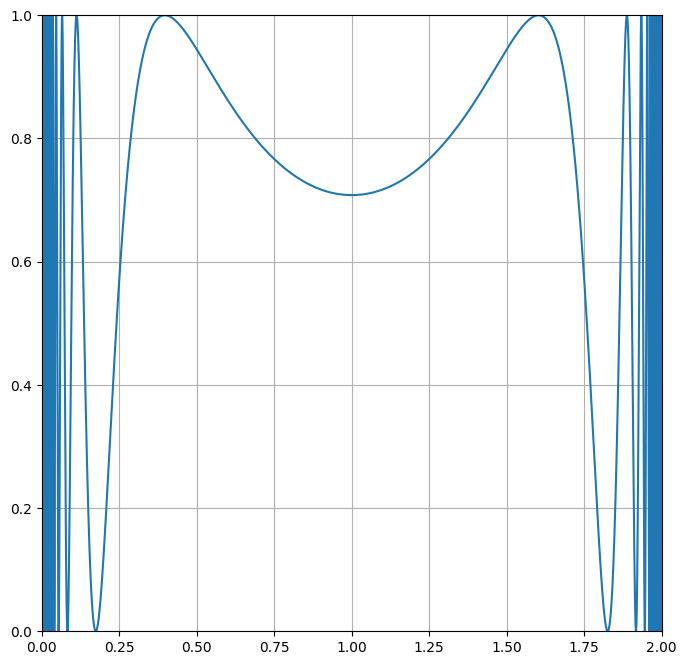

In [15]:
x = np.arange(0.00001,2,0.00001)
y = np.sin(1/(x*(2-x)))**2

plt.figure(figsize=(8,8))
plt.plot(x,y)
plt.axis([0, 2, 0, 1])
plt.grid()

Let's zoom in on one of the wings, and we can see the problem. The integral varies wildly!

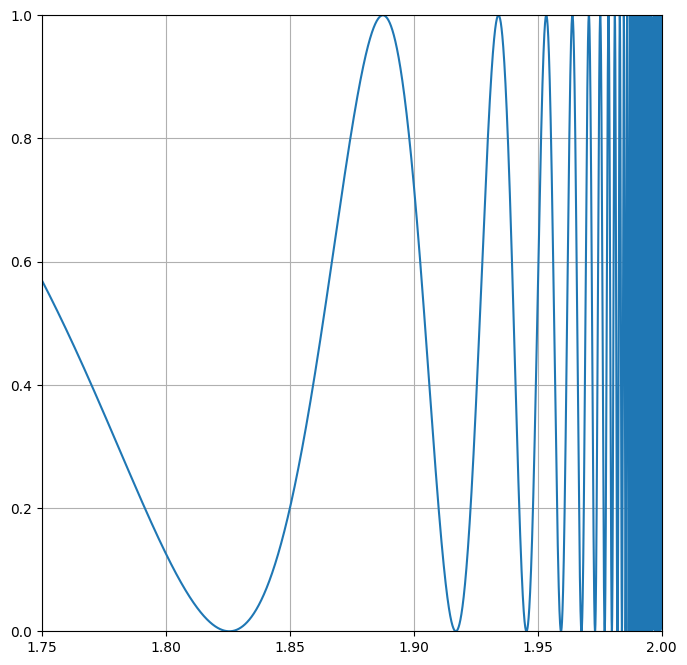

In [16]:
x = np.arange(0.00001,2,0.00001)
y = np.sin(1/(x*(2-x)))**2

plt.figure(figsize=(8,8))
plt.plot(x,y)
plt.axis([1.75, 2, 0, 1])
plt.grid()

## Bring in Monte Carlo

Following the same approach estimate the value of the integral for this function and the uncertainty in your estimate.

Final result:  1.4564564564564564
Mean of 20% chunk: 1.4519040834536168


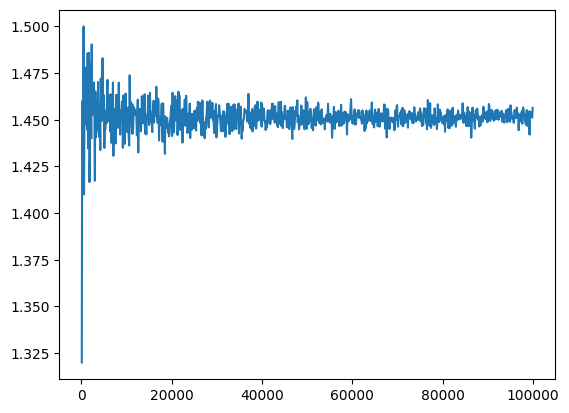

In [17]:
## your code here
estimate_area(1000, (0, 2), (0, 1), lambda x: np.sin(1/(x*(2-x)))**2)

N = np.arange(100,100000,100)
area_estimates = np.zeros(len(N))
for i, n in enumerate(N):
    area_estimates[i] = estimate_area2(n, (0, 2), (0, 1), lambda x: np.sin(1/(x*(2-x)))**2)

plt.plot(N,area_estimates)
print("Final result: ", area_estimates[-1])
print("Mean of 20% chunk:", area_estimates[:int(len(area_estimates)*0.2)].mean())

800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
Final result:  1.4514080808080807
Mean of 20% chunk: 1.4511973139091925


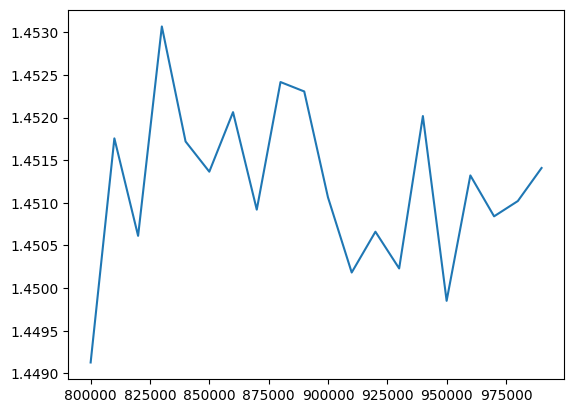

In [18]:
N = np.arange(800000,1000000,10000)
area_estimates = np.zeros(len(N))
for i, n in enumerate(N):
    if n % 10000 == 0:
        print(n)
    area_estimates[i] = estimate_area2(n, (0, 2), (0, 1), lambda x: np.sin(1/(x*(2-x)))**2)

plt.plot(N,area_estimates)
print("Final result: ", area_estimates[-1])
print("Mean of 20% chunk:", area_estimates.mean())

In [19]:
estimate_area2(1000000, (0, 2), (0, 1), lambda x: np.sin(1/(x*(2-x)))**2)

1.452898

In [20]:
%timeit estimate_area(1000000, (0, 2), (0, 1), lambda x: np.sin(1/(x*(2-x)))**2)
%timeit estimate_area2(1000000, (0, 2), (0, 1), lambda x: np.sin(1/(x*(2-x)))**2)

4.47 s ± 326 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
177 ms ± 22.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
estimate_area2(int(1E8), (0, 2), (0, 1), lambda x: np.sin(1/(x*(2-x)))**2)

1.4515067